# **Natural Language Processing (Sentiment Analysis)**

Name: Seanrei Ethan M. Valdeabella

Date: February 6, 2025

In [161]:
#@title Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [162]:
#@title Importing the dataset

dataset_name = "Restaurant_Reviews.tsv" #@param {type:"string"}
dataset = pd.read_csv(dataset_name, delimiter="\t", quoting=3)

In [163]:
#@title Cleaning the texts
import re
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer


# Cleaning
corpus = []
for i in range(0, len(dataset.values)):
  review = re.sub("[^a-zA-Z]", " ", dataset["Review"][i])
  review = review.lower()
  review = review.split()  # Splitting the text into individual words (Tokenization)

  # Stemming
  ps = PorterStemmer()
  all_stopwords = stopwords.words("english")
  all_stopwords.remove("not")  # Remove "not" from the stopwords so that it would not be removed since "not" is important for the negative texts
  review = [ps.stem(word) for word in review if word not in set(all_stopwords)]  # Convert to set for efficiency
  review = " ".join(review)
  corpus.append(review)

print(corpus)
#@markdown  Upon coding, I have learned that the corpus needs to have full texts.
#@markdown  At first, I thought that the corpus was list of words, and I was
#@markdown  confused when we re-joined the review variable back together.
#@markdown
#@markdown  The corpus, instead, is a list containing full texts. This is because
#@markdown  **NLP Models** learn from texts, and not individual words

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['wow love place', 'crust not good', 'not tasti textur nasti', 'stop late may bank holiday rick steve recommend love', 'select menu great price', 'get angri want damn pho', 'honeslti tast fresh', 'potato like rubber could tell made ahead time kept warmer', 'fri great', 'great touch', 'servic prompt', 'would not go back', 'cashier care ever say still end wayyy overpr', 'tri cape cod ravoli chicken cranberri mmmm', 'disgust pretti sure human hair', 'shock sign indic cash', 'highli recommend', 'waitress littl slow servic', 'place not worth time let alon vega', 'not like', 'burritto blah', 'food amaz', 'servic also cute', 'could care less interior beauti', 'perform', 'right red velvet cake ohhh stuff good', 'never brought salad ask', 'hole wall great mexican street taco friendli staff', 'took hour get food tabl restaur food luke warm sever run around like total overwhelm', 'worst salmon sashimi', 'also combo like burger fri beer decent deal', 'like final blow', 'found place accid could not

In [164]:
#@title Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features=1500)

X = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:, -1].values

# len(X)  # To see how many words there are, to set/modify the max_features

In [165]:
#@title Splitting the dataset into the Training Set and Test Set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## **Gaussian Naive Bayes**

In [166]:
#@title Training the Naive Bayes model on the Training Set
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [167]:
#@title Predicting the Test Set results
y_pred = nb.predict(X_test)

Confusion Matrix:
[[55 42]
 [12 91]]
Accuracy Score: 0.73
Precision Score: 0.6842105263157895
Recall Score: 0.883495145631068
F1 Score: 0.7711864406779662


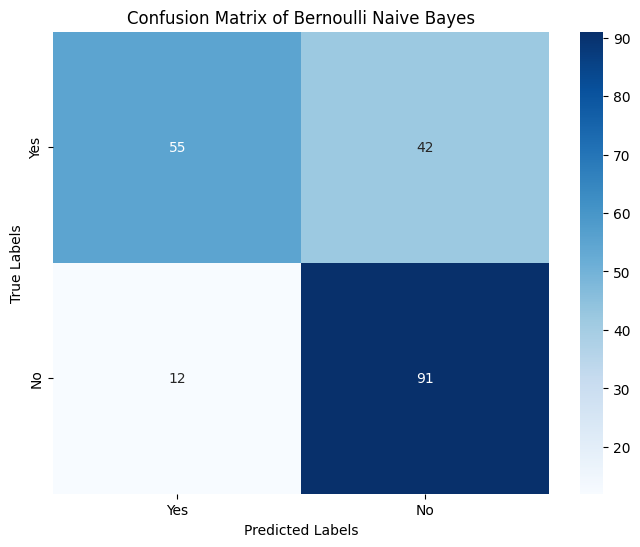

In [168]:
#@title Evaluating the model
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
acc_score = accuracy_score(y_test, y_pred)
ps = precision_score(y_test, y_pred)
rs = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Confusion Matrix:\n{cm}")
print(f"Accuracy Score: {acc_score}")
print(f"Precision Score: {ps}")  # Measuring exactness
print(f"Recall Score: {rs}")  # Measuring Completeness
print(f"F1 Score: {f1}")  # Compromise between Precision and Recall

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Yes', 'No'], yticklabels=['Yes', 'No'])
plt.title("Confusion Matrix of Bernoulli Naive Bayes")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

## **Bernoulli Naive Bayes**

In [169]:
#@title Training the Naive Bayes model on the Training Set
from sklearn.naive_bayes import BernoulliNB

nb = BernoulliNB()
nb.fit(X_train, y_train)

BernoulliNB()

In [170]:
#@title Predicting the Test Set results
y_pred = nb.predict(X_test)

Confusion Matrix:
[[73 24]
 [21 82]]
Accuracy Score: 0.775
Precision Score: 0.7735849056603774
Recall Score: 0.7961165048543689
F1 Score: 0.784688995215311


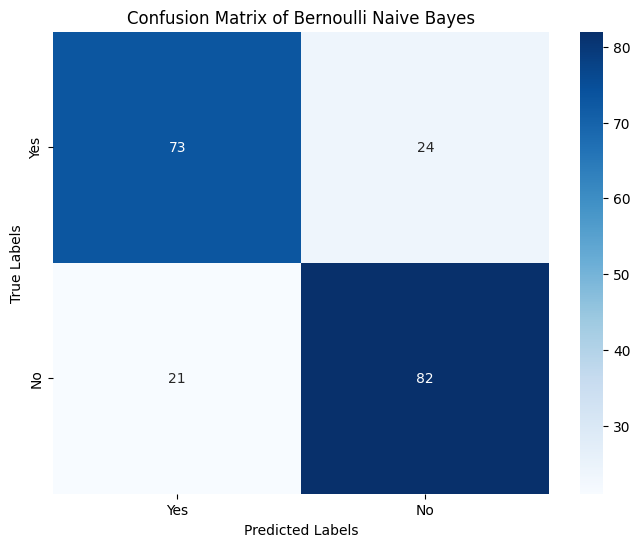

In [171]:
#@title Evaluating the model
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
acc_score = accuracy_score(y_test, y_pred)
ps = precision_score(y_test, y_pred)
rs = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Confusion Matrix:\n{cm}")
print(f"Accuracy Score: {acc_score}")
print(f"Precision Score: {ps}")  # Measuring exactness
print(f"Recall Score: {rs}")  # Measuring Completeness
print(f"F1 Score: {f1}")  # Compromise between Precision and Recall

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Yes', 'No'], yticklabels=['Yes', 'No'])
plt.title("Confusion Matrix of Bernoulli Naive Bayes")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

## Predicting a new review

In [182]:
new_review = "I am not going to stop loving this restaurant" #@param {type:"string"}
new_review = re.sub('[^a-zA-Z]', " ", new_review)
new_review = new_review.lower()
new_review = new_review.split()
ps = PorterStemmer()
all_stopwords = stopwords.words("english")
all_stopwords.remove('not')
new_review = [ps.stem(word) for word in new_review if not word in set(all_stopwords)]
new_review = ' '.join(new_review)
new_corpus = [new_review]
new_X_test = cv.transform(new_corpus).toarray()
new_y_pred = nb.predict(new_X_test)
print(new_y_pred)

[1]
